<a href="https://colab.research.google.com/github/Aman-pr/loan_prediction_model/blob/main/Loanprediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import data
import pandas as pd
data=pd.read_csv('/content/loan_data.csv')
data

In [ ]:
#null value check
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
#formating data checking
data.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [ ]:
#duplicates checking
print(data.duplicated().sum())
#droping duplicate
#data.drop_duplicates(inplace=True)

0


In [ ]:
print(data['person_education'].value_counts())
print("\n")
print(data['person_home_ownership'].value_counts())
print("\n")
print(data['previous_loan_defaults_on_file'].value_counts())

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64


person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64


previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
data['person_education_label']=label_encoder.fit_transform(data['person_education'])


In [ ]:
#one-hot Coading
data=pd.get_dummies(data,columns=['person_home_ownership','previous_loan_defaults_on_file','person_gender','loan_intent'],drop_first=True)
data


In [ ]:
data.dtypes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#X and Y prepartion
X=data.drop('loan_status',axis=1)
y=data['loan_status']

In [ ]:
#scalling
numerical_cols=[
    'person_age','person_income','person_emp_exp','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score'

]
scaler=StandardScaler()
X[numerical_cols]=scaler.fit_transform(X[numerical_cols])

In [ ]:
#spliting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Model training
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#prediction
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Model Accuracy",accuracy)

Model Accuracy 0.8922222222222222


In [ ]:
from sklearn.metrics import confusion_matrix
cm=(confusion_matrix(y_test,y_pred))
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[6558  432]
 [ 538 1472]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

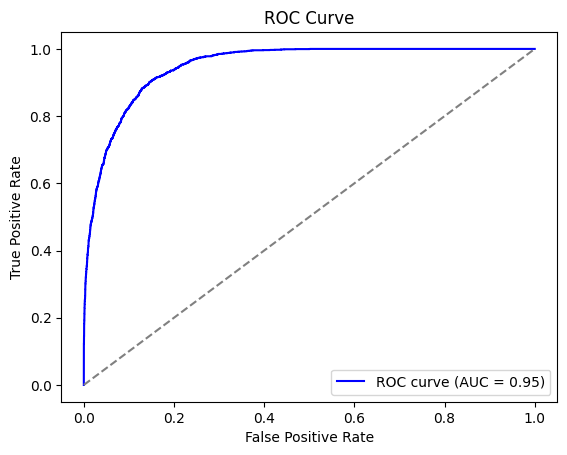

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
dt_pred = dt_model.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.899


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.9316666666666666


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.9365555555555556


In [ ]:
import pickle

# Assuming xgb_model is your trained XGBoost model
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))


Confusion Matrix:
 [[6794  196]
 [ 375 1635]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.81      0.85      2010

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.91      9000
weighted avg       0.94      0.94      0.94      9000



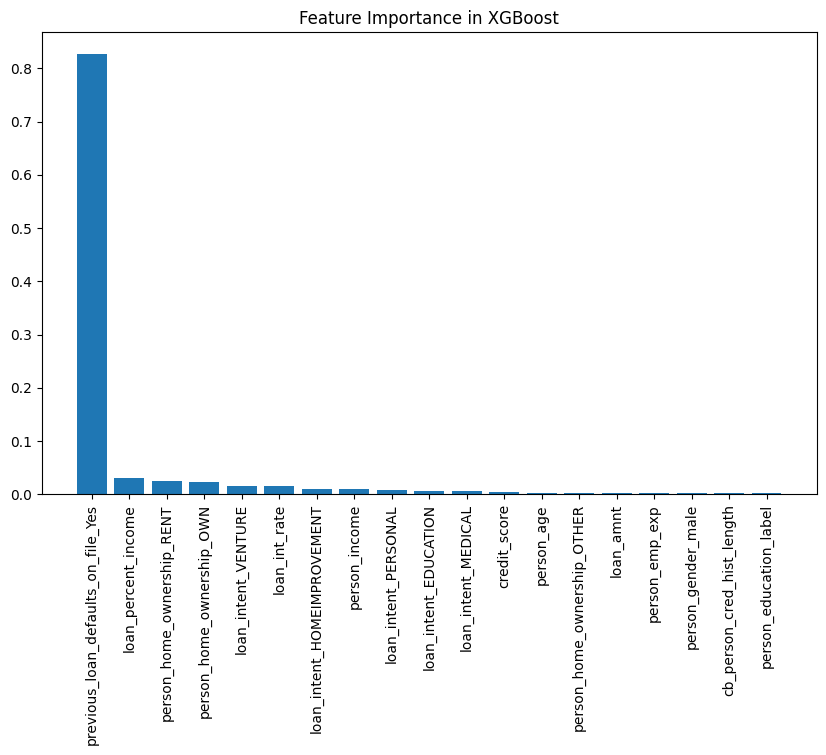

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), np.array(X.columns)[sorted_idx], rotation=90)
plt.title("Feature Importance in XGBoost")
plt.show()

In [ ]:
X_test

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_education_label,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,previous_loan_defaults_on_file_Yes,person_gender_male,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
37979,0.700710,0.205740,0.756938,7500.0,-1.667332,-0.684829,1.065174,-0.626719,0,False,False,False,False,True,True,False,False,False,False
9911,-0.622689,-0.291974,0.097249,9000.0,0.162280,0.232483,-0.481354,0.285341,0,False,False,True,True,True,True,False,False,False,False
43386,-0.953538,-0.534944,-0.892284,5000.0,1.300331,-0.111509,-0.481354,1.554293,4,False,False,True,False,False,False,False,True,False,False
13822,-0.788113,-0.502042,-0.727362,5000.0,1.001551,-0.111509,-0.739109,-0.706028,1,False,True,False,True,False,False,False,False,False,True
44810,2.354959,-0.153504,2.406160,10000.0,1.478257,0.117819,1.322928,-0.924130,3,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14572,-1.118963,0.657609,-0.892284,14000.0,-0.341283,-0.340837,-0.996863,0.424132,1,False,False,False,False,True,False,False,False,False,True
30384,1.858684,-0.229168,1.911393,6725.0,1.827393,-0.340837,1.322928,-0.527582,3,False,False,True,True,True,True,False,False,False,False
36665,-0.622689,-0.017023,-0.727362,14000.0,0.215993,0.461810,-0.739109,-0.368963,4,False,False,True,False,False,True,False,False,False,False
30569,1.693259,-0.536884,1.746471,8000.0,0.001139,0.920466,2.096192,1.237055,0,False,False,True,False,True,False,False,True,False,False
